# Case study of the RMRP

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

As a supplementary case study, we use IRIS to predict the structure ensemble on the RMRP. Here, we make the codes and descriptions as concise as possible to make this notebook a demo of running IRIS as APIs in Python scripts. For detailed descriptions of running IRIS, please move to the case study of the U2 snRNP in [Case_study_U2_snRNA.ipynb](Case_study_U2_snRNA.ipynb).

First, we prepare the input of the RNA sequence with the mapped PARIS reads through the following codes.

In [2]:
demo_rna_id = 'bpRNA_RFAM_4778|RF00030_M29212.1_2-265|RNase_MRP|Rfam||0|264|1|published'

from IRIS.Info_RNA import *
from Bio import SeqIO

for ref_rna in SeqIO.parse('./data/Rfam_H.S._nonsim.fa', 'fasta'):
    if ref_rna.id == demo_rna_id:
        demo_rna = Info_RNA(ref_rna.id, ref_rna.seq)
        
demo_rna.PARIS = Info_PARIS('./data/PARIS_reads/split/' + demo_rna.ident + '.bam')
        
location_marker = [0, 50, 100, 150, 200, 264]
print('ID:', demo_rna.ident)
print('Sequence:', demo_rna.seq)

ID: bpRNA_RFAM_4778|RF00030_M29212.1_2-265|RNase_MRP|Rfam||0|264|1|published
Sequence: UUCGUGCUGAAGGCCUGUAUCCUAGGCUACACACUGAGGACUCUGUUCCUCCCCUUUCCGCCUAGGGGAAAGUCCCCGGACCUCGGGCAGAGAGUGCCACGUGCAUACGCACGUAGACAUUCCCCGCUUCCCACUCCAAAGUCCGCCAAGAAGCGAUUCCCGCUGAGCGGCGUGGCGCGGGGGCGUCAUCCGUCAGCUCCCUCUAGUUACGCAGGCAGUGCGUGUCCGCGCACCUACCACACGGGGCUCAAUUCUCAGCGCGGC


Then, we import the IRIS API and run IRIS step by step as the following code snippets.

The first step is to create a `Scoring` object using the input data wrapped in the object of `Info_RNA`, and then run the member function `compute_PARIS_support()` to compute the PARIS support.

=== Convert PARIS reads to PARIS support matrix ===
--- The standard deviation is 4.648
=== Finished! ===




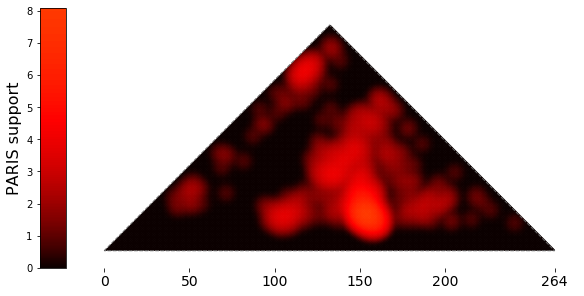

In [3]:
from IRIS.IRIS_Core import *
from IRIS.Baseline_Methods import *

IRIS_scoring = Scoring(demo_rna)
IRIS_scoring.compute_PARIS_support()

IRIS_scoring.plot_PARIS_support(location_marker)

The second step is to establish a `Generating` object with the PARIS support as an additional input. The candidate structures are generated by function `generate()` with the parameters of the number of candidate structures, the fraction threshold, and the range of length *k* of stems.

In [4]:
IRIS_generating = Generating(demo_rna, IRIS_scoring.PARIS_support)
IRIS_generating.generate(100, 0.75, [4, 5, 6, 7])

=== Generate candidate structures ===
+++ 100 structures expected
+++ Stems with PARIS support higher than 0.750 of all PARIS support are collected
+++ The range of length k for stems is  [4, 5, 6, 7]
--- The 0.750 fraction of PARIS support is 1.663
--- 630 4-mers can perfectly match (178 have high PARIS supports)
--- 231 5-mers can perfectly match (72 have high PARIS supports)
--- 83 6-mers can perfectly match (30 have high PARIS supports)
--- 34 7-mers can perfectly match (13 have high PARIS supports)
--- 293 stems are collected with high PARIS supports

--- 102 stems are retained after eliminating redundant stems
--- 5253 combinations of stems need to check if is compatible
--- 2572 compatible stems are reserved as hard constraints

--- Perform the constrained RNA folding algorithm
--- 257 structures completed ...
--- 514 structures completed ...
--- 771 structures completed ...
--- 1028 structures completed ...
--- 1285 structures completed ...
--- 1542 structures completed ...
---

The last step uses the PARIS support and the candidate structures to build a `Picking` object. The function `pick()` infers the optimal ensemble with the desired number of representative structures determined by the input parameter.

In [5]:
IRIS_picking = Picking(demo_rna, IRIS_scoring.PARIS_support, IRIS_generating.candidate_structures)
IRIS_picking.pick(2)

print('=== The predicted ensemble of IRIS-2 of the RMRP is')
IRIS_picking.ensemble.show()

=== Pick the optimal ensemble with 2 structures ===
--- The lambda for the exponential distribution is 22.722
--- Eliminate redundant structures using LASSO regression
--- Try gamma = 1.00e+00, and get 0 non-zero coefficients
--- Try gamma = 5.00e-01, and get 0 non-zero coefficients
--- Try gamma = 2.50e-01, and get 0 non-zero coefficients
--- Try gamma = 1.25e-01, and get 0 non-zero coefficients
--- Try gamma = 6.25e-02, and get 0 non-zero coefficients
--- Try gamma = 3.12e-02, and get 0 non-zero coefficients
--- Try gamma = 1.56e-02, and get 0 non-zero coefficients
--- Try gamma = 7.81e-03, and get 0 non-zero coefficients
--- Try gamma = 3.91e-03, and get 0 non-zero coefficients
--- Try gamma = 1.95e-03, and get 6 non-zero coefficients
--- 6 non-zero coefficients are retained (end up with gamma = 1.95e-03)
--- 15 candidate ensembles are generated
=== Finished ===


=== The predicted ensemble of IRIS-2 of the RMRP is
+++ Structure 1: 0.536192
.(((((((((..((((((.((((((((........(((((..

Here, we draw the representative structures in the predicted ensemble.

--- Plotting structure 1 (0.536) ... 
--- Plotting structure 2 (0.464) ... 

./output/RF00030_M29212.1_2-265/Structure1_0.536.png


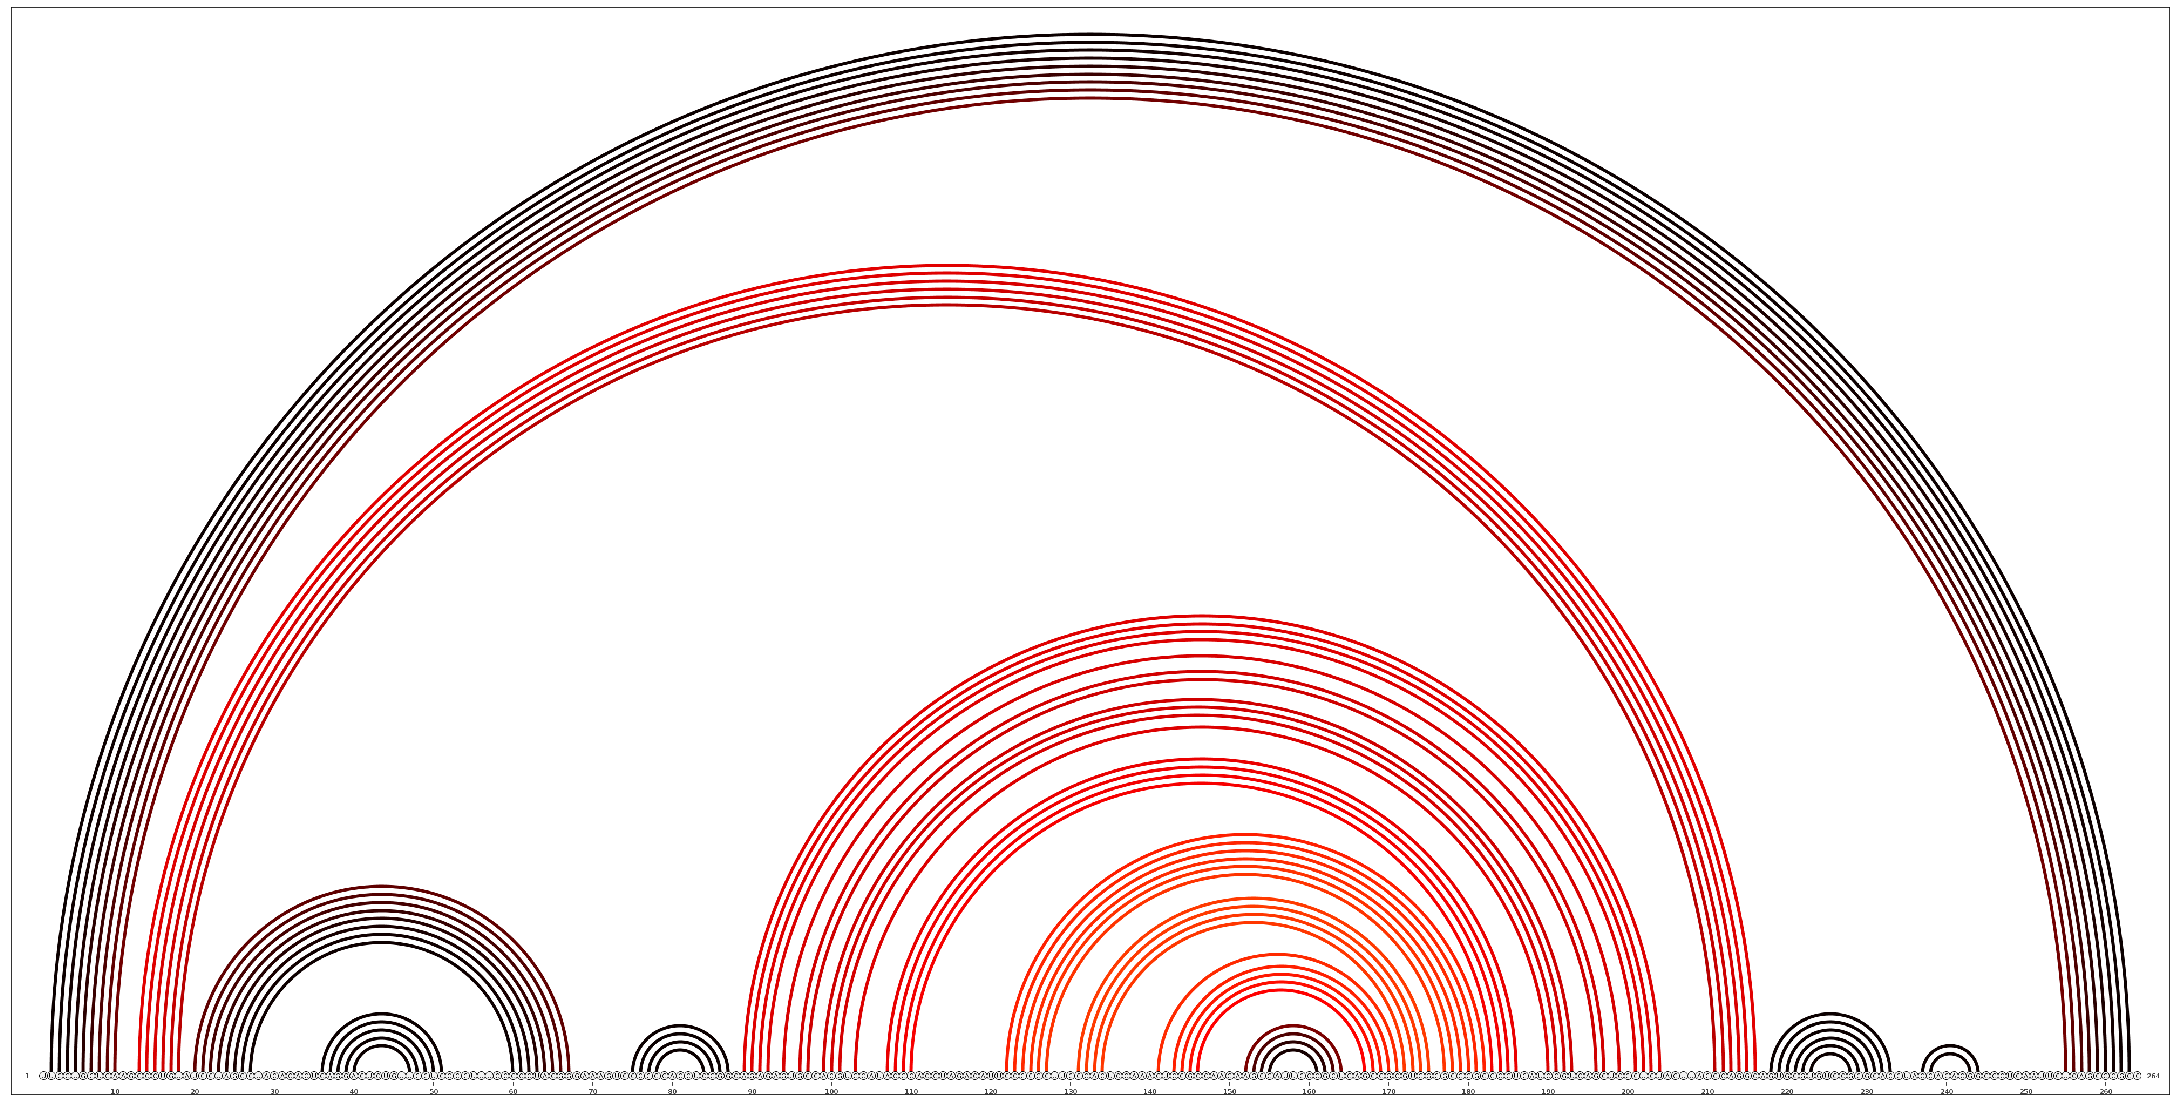


./output/RF00030_M29212.1_2-265/Structure2_0.464.png


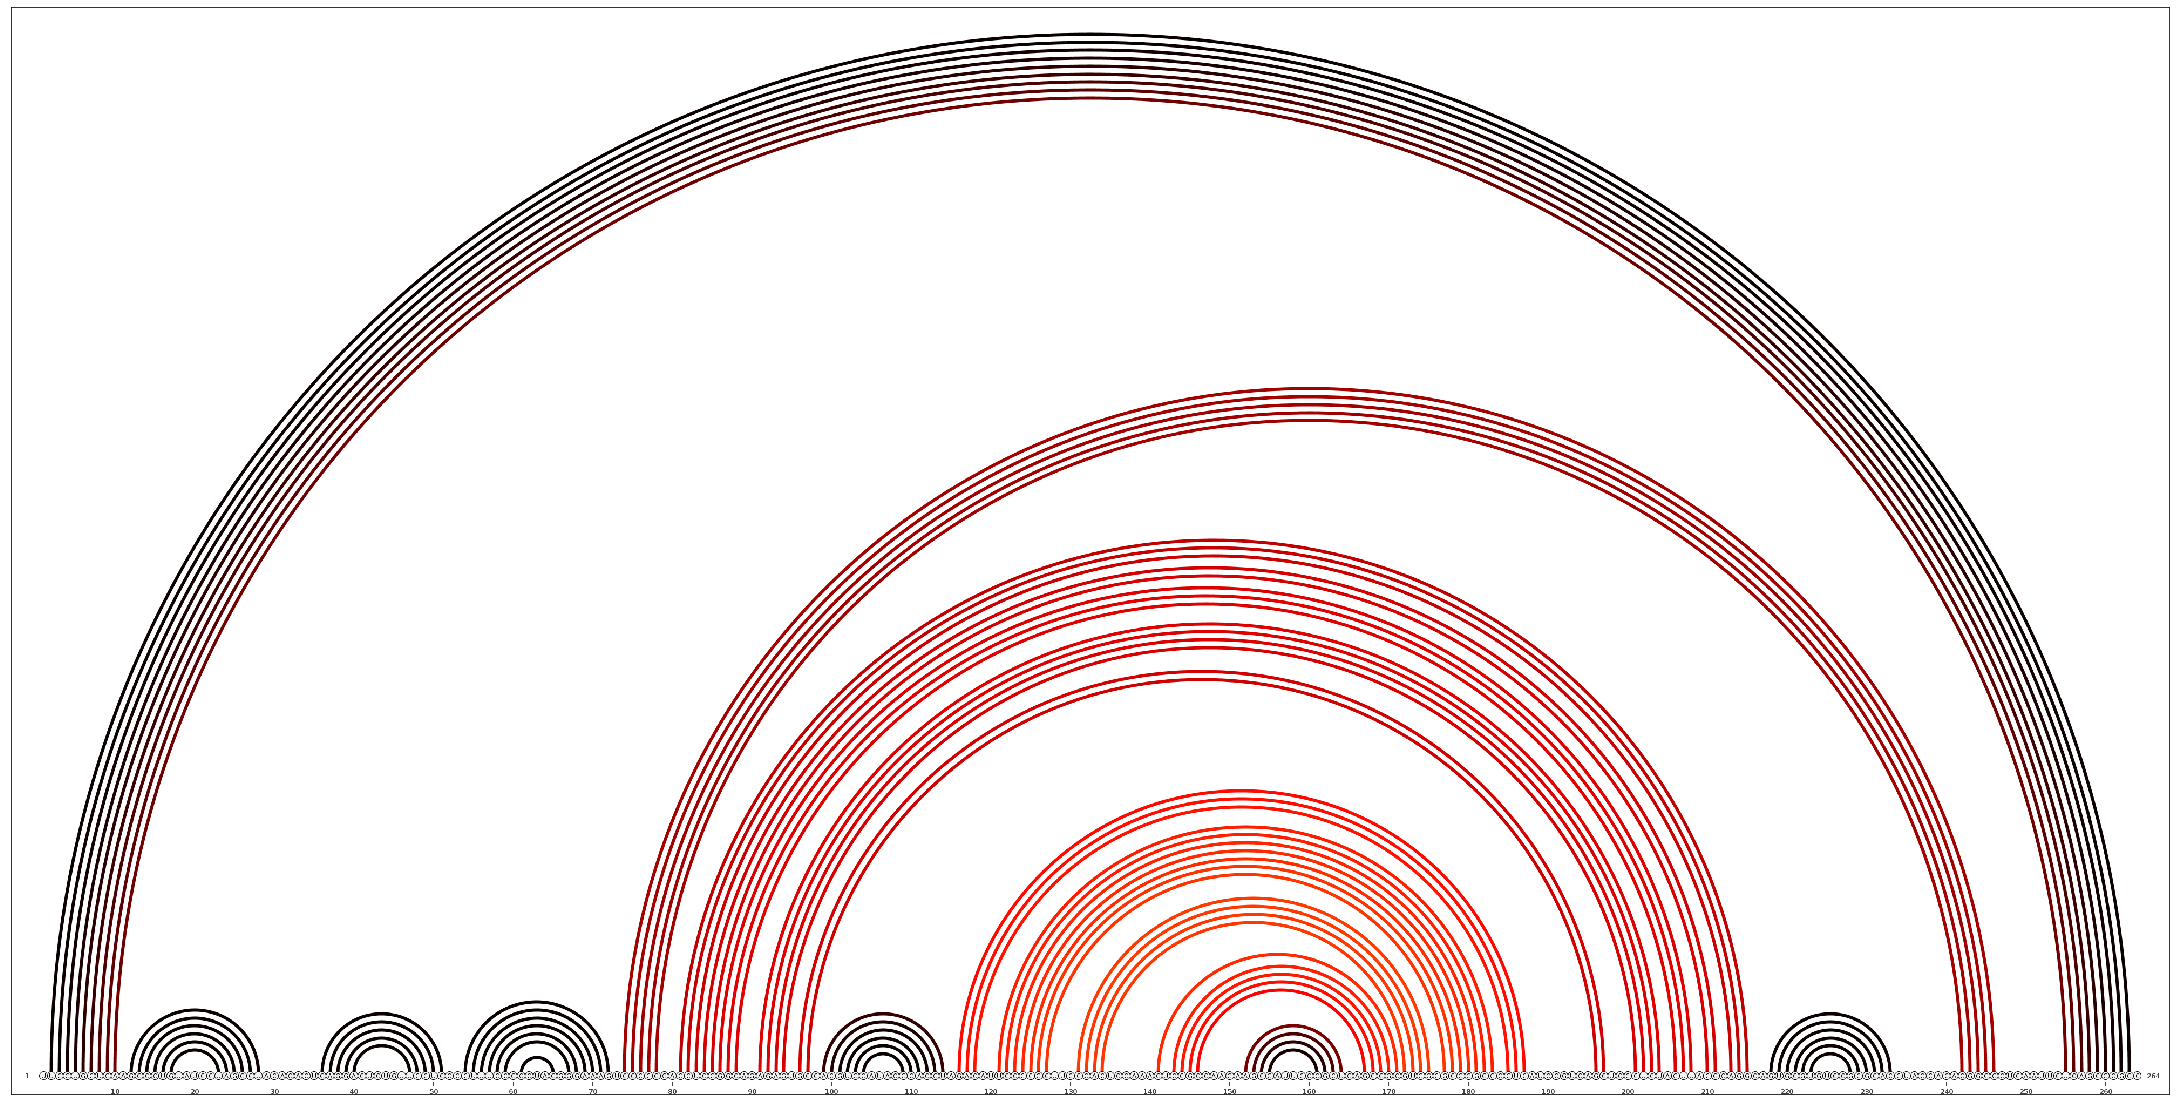

In [6]:
import os

output_dir = './output/' + demo_rna.ident.split('|')[1]
# Create the output folder
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
# Clean existed figures
for root, dirs, files in os.walk(output_dir):
    for file in files:
        os.remove(os.path.join(root, file))
        
rainbow_plot_files = IRIS_picking.ensemble.plot(IRIS_scoring.PARIS_support, output_dir)

from PIL import Image
import matplotlib.pyplot as plt
for figure_path in rainbow_plot_files:
    print('\n' + figure_path)
    img = Image.open(figure_path)
    fig = plt.figure(figsize = (40, 20))
    plt.xticks([]); plt.yticks([])
    plt.imshow(img)
    plt.show()

Additionally, we show the evolutionary conservation information from the [RMRP family](https://rfam.org/family/RF00030), and investigate the predicted ensembles from IRIS-1, IRIS-2, IRIS-3 and MFE by measuring KL distance, and plot base-pairing probability matrices.

In [7]:
demo_rna.coevolution = Info_Coevolution(demo_rna, './data/Rfam_MSA/sto_files', './data/Rfam_MSA/cov_files')

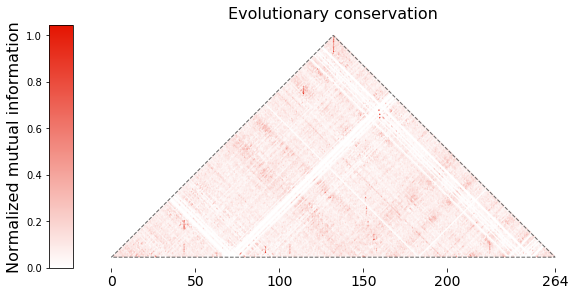

In [8]:
from IRIS.Utils import *
demo_rna.coevolution.plot_covariation_matrix(location_marker)

In [9]:
mfe = MFE(demo_rna)
mfe.predict()
MFE_ensemble = mfe.ensemble
IRIS_picking.ostream = open('/dev/null', 'w')
IRIS_picking.pick(1)
IRIS_1_ensemble = IRIS_picking.ensemble
IRIS_picking.pick(2)
IRIS_2_ensemble = IRIS_picking.ensemble
IRIS_picking.pick(3)
IRIS_3_ensemble = IRIS_picking.ensemble

ensembles = {'MFE': MFE_ensemble, 'IRIS-1': IRIS_1_ensemble, 
             'IRIS-2': IRIS_2_ensemble, 'IRIS-3': IRIS_3_ensemble}

In [10]:
from tabulate import tabulate

KL_MFE = demo_rna.coevolution.evaluate_KL_divergence(MFE_ensemble)
KL_IRIS_1 = demo_rna.coevolution.evaluate_KL_divergence(IRIS_1_ensemble)
KL_IRIS_2 = demo_rna.coevolution.evaluate_KL_divergence(IRIS_2_ensemble)
KL_IRIS_3 = demo_rna.coevolution.evaluate_KL_divergence(IRIS_3_ensemble)

print(tabulate([[demo_rna.ident.split('|')[1], KL_MFE, 
                 Utils.emphasize(KL_IRIS_1, KL_MFE, '<='),
                 Utils.emphasize(KL_IRIS_2, KL_MFE, '<='),
                 Utils.emphasize(KL_IRIS_3, KL_MFE, '<=')]], 
               headers = ['Rfam ID', 'MFE', 'IRIS-1', 'IRIS-2', 'IRIS-3']))

Rfam ID                     MFE    IRIS-1    IRIS-2    IRIS-3
----------------------  -------  --------  --------  --------
RF00030_M29212.1_2-265  127.914       131      96.1      85.3


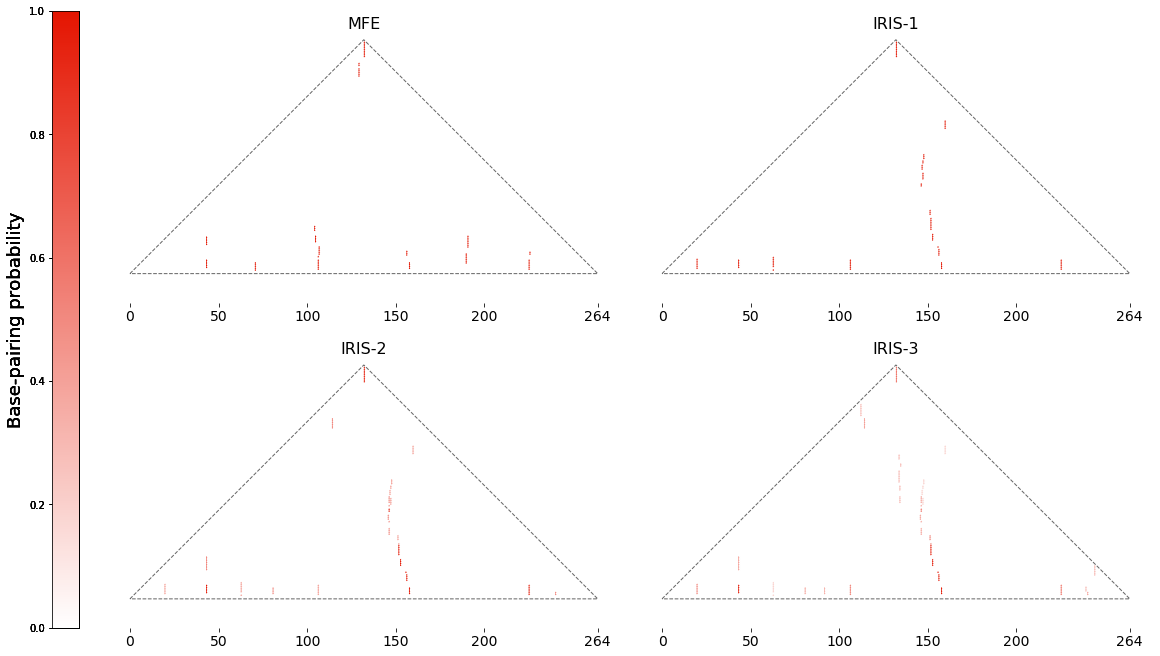

In [11]:
fig, axs = plt.subplots(2, 2, figsize = (16, 9), constrained_layout=True)
locs = [(0,0), (0,1), (1,0), (1,1)]
i_loc = 0
for label in ensembles:
    ax = axs[locs[i_loc]]
    Utils.plot_triangle_matrix(ax, ensembles[label].get_bpp_per_pair(), Utils.white2red_cmap)
    ax.set_title(label, y = 0.92, fontsize = 16)
    ax.set_xticks(location_marker)
    ax.set_xticklabels(location_marker, y = 0, fontsize = 14)
    i_loc += 1
    cbar1 = fig.colorbar(cm.ScalarMappable(mpl.colors.Normalize(0, 1),  Utils.white2red_cmap), 
                         aspect = 40, ax = axs, location = 'left')
    cbar1.set_label(label = 'Base-pairing probability', fontsize = 18)
plt.show()